![](https://pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)

# Introduction

Fashion-MNIST is a dataset of images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.   
Each example is a 28x28 grayscale image, associated with a label from 10 classes.  

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
- Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
- The training and test data sets have 785 columns.
- Each row is a separate image
- Each value is integer (1 to 255)

In [54]:
# Basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns

# preprocessing and split
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# Scores and reports
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Warning ignor
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv("fashion-mnist_train.csv")
X_finel_test = pd.read_csv("fashion-mnist_test.csv")

## Basic info:

In [3]:
print("Test size: " , X_finel_test.shape)
print("Train size:" , X_train.shape)

Test size:  (10000, 785)
Train size: (60000, 785)


In [4]:
X_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot  

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


# Modeling:

In [6]:
y_train = X_train["label"]
x_train = X_train.drop(["label"], axis=1)/255
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [7]:
x_train , x_test , y_train , y_test = split(x_train,y_train ,train_size = 0.8 , shuffle = True , random_state = 1)

## Simple models:

In [8]:
KNN = KNeighborsClassifier()

# One approach for using binary classification algorithms for multi-classification problems 
# is to split the multi-class classification dataset into multiple binary classification datasets 
# and fit a binary classification model on each.
LR = LogisticRegression(multi_class="ovr")


DT = DecisionTreeClassifier()


In [9]:
KNN.fit(x_train,y_train)
print("KNN Done")
LR.fit(x_train,y_train)
print("LR Done")
DT.fit(x_train,y_train)
print("DT Done")

KNN Done
LR Done
DT Done


In [10]:
print("KNeighbors mean accuracy: {:.2f}%".format(KNN.score(x_test, y_test)*100))
print("LogisticRegression mean accuracy: {:.2f}%".format(LR.score(x_test, y_test)*100))
print("DecisionTreeClassifier mean accuracy: {:.2f}%".format(DT.score(x_test, y_test)*100))

KNeighbors mean accuracy: 85.07%
LogisticRegression mean accuracy: 85.10%
DecisionTreeClassifier mean accuracy: 79.41%


## Ensamble Models:

GradientBoosting -  
Gradient Boosting produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.  
Like other boosting methods, gradient boosting combines weak "learners" into a single strong learner in an iterative fashion.

Xgboost -  
XGBoost stands for eXtreme Gradient Boosting, is an implementation of gradient boosted decision trees designed for speed and performance.

In [11]:
XG = XGBClassifier(n_estimators= 150, n_jobs=-1, learning_rate=0.5, seed=0, eval_metric = 'mlogloss')

GB = GradientBoostingClassifier(n_estimators=25,learning_rate=0.1, random_state=20 )

In [12]:
%%time
XG.fit(x_train,y_train)
print("XG Done")
GB.fit(x_train,y_train)
print("GB Done")

XG Done
GB Done
CPU times: user 1h 36min 19s, sys: 7.25 s, total: 1h 36min 26s
Wall time: 22min 51s


In [13]:
print("xgboost mean accuracy: {:.2f}%".format(XG.score(x_test, y_test)*100))
print("GradientBoosting mean accuracy: {:.2f}%".format(GB.score(x_test, y_test)*100))

xgboost mean accuracy: 90.31%
GradientBoosting mean accuracy: 83.41%


## Score summary:

In [14]:
score_list = [
    KNN.score(x_test, y_test)*100,
    LR.score(x_test, y_test)*100,
    DT.score(x_test, y_test)*100,
    XG.score(x_test, y_test)*100,
    GB.score(x_test, y_test)*100
             ]
scoreDf = pd.DataFrame(data = score_list
             , columns = ['mean accuracy'], index = ['KNN', 'LR', 'DT', 'xgboost','GradientBoosting'])
scoreDf

,mean accuracy
KNN,85.066667
LR,85.100000
DT,79.408333
xgboost,90.308333
GradientBoosting,83.408333


## Let as use pca to reduce Dimensions.

### we need to find the best 'n_components'  Given the relationship between the dimensions and the representation of the data.

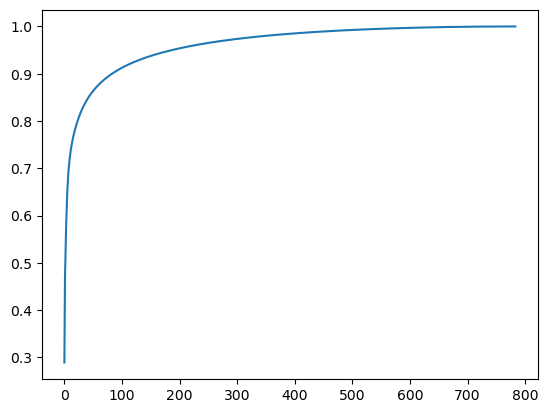

In [15]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

## We will try the same model after PCA

In [16]:
pca = PCA(n_components=200)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [17]:
LR_PCA = LogisticRegression(multi_class="ovr")
XG_PCA = XGBClassifier(n_estimators= 150, n_jobs=-1, learning_rate=0.5, seed=0, eval_metric = 'mlogloss')

In [18]:
LR_PCA.fit(pca_x_train, y_train)
XG_PCA.fit(pca_x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=0,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [19]:
print("LogisticRegression mean accuracy: {:.2f}%".format(LR_PCA.score(pca_x_test, y_test)*100))
print("xgboost mean accuracy: {:.2f}%".format(XG_PCA.score(pca_x_test, y_test)*100))

LogisticRegression mean accuracy: 85.12%
xgboost mean accuracy: 88.79%


In [20]:
score_list = [LR.score(x_test, y_test)*100,XG.score(x_test, y_test)*100 , LR_PCA.score(pca_x_test, y_test)*100 , XG_PCA.score(pca_x_test, y_test)*100 ]
principalDf = pd.DataFrame(data = score_list
             , columns = ['mean accuracy'], index = ['LR', 'xgboost', 'Lr_pca', 'xgboost_pca'])
principalDf

,mean accuracy
LR,85.100000
xgboost,90.308333
Lr_pca,85.125000
xgboost_pca,88.791667


# Final result:

We can see that xgboost with PCA use only 25% of the data and the final result is 88.79% (vs 100% of the data with 90.3%) so we will prefer to use the model after PCA! 

Lat us test on the real test file:

In [21]:
X_finel_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
Y_test = X_finel_test["label"]
X_test = X_finel_test.drop(["label"], axis=1)/255
pca_x_test = pca.transform(X_test)

In [23]:
print("xgboost mean accuracy: {:.2f}%".format(XG_PCA.score(pca_x_test, Y_test)*100))
print("LR_PCA mean accuracy: {:.2f}%".format(LR_PCA.score(pca_x_test, Y_test)*100))

xgboost mean accuracy: 88.51%
LR_PCA mean accuracy: 85.41%


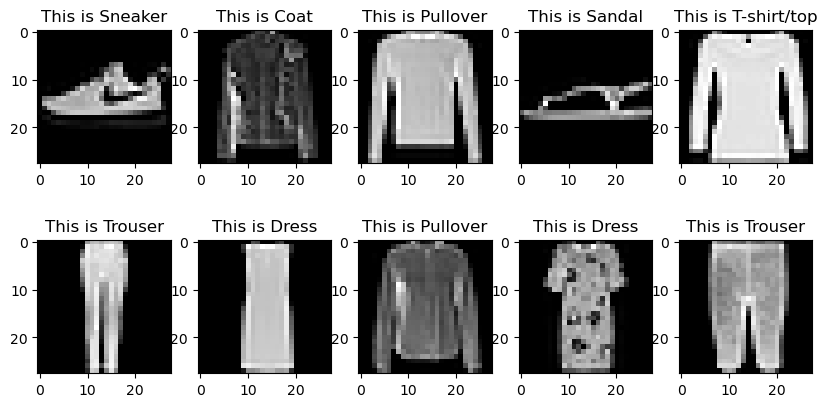

In [24]:
classes = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

f, axarr = plt.subplots(2,5 , figsize = (10,5))
plt.gray()
for i,j in enumerate(np.random.randint(0, len(X_test), 10)) :
    image = X_test[j:j+1]
    image_class = classes[XG_PCA.predict(pca.transform(image))[0]]
    image = np.array(image).reshape(28,28)
    axarr[i//5, i%5].imshow(image)
    axarr[i//5, i%5].set_title("This is {}".format(image_class))

plt.show()

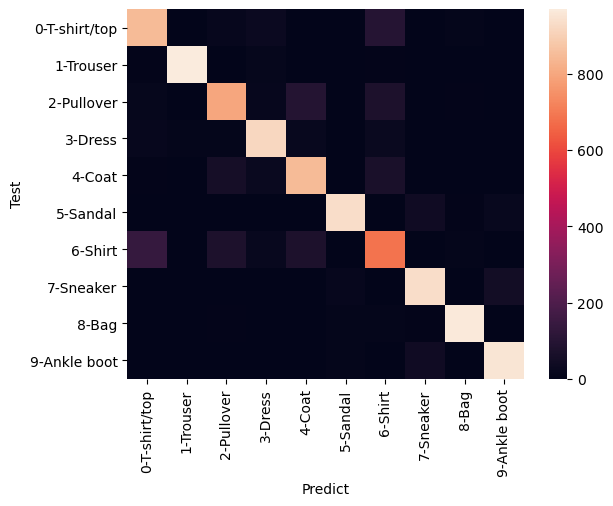

In [47]:
y_pred = XG_PCA.predict(pca_x_test)
cm = confusion_matrix(Y_test, y_pred)
columns = classes.items()
cm_pd = pd.DataFrame(data =cm, index=columns, columns=columns)
sns.heatmap(cm_pd,fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Test")
plt.show()

In [55]:
print("xgboost report on trining data")
print(classification_report(Y_test,y_pred))

xgboost report on trining data
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.80      0.81      1000
           3       0.90      0.92      0.91      1000
           4       0.82      0.85      0.83      1000
           5       0.96      0.93      0.95      1000
           6       0.71      0.68      0.70      1000
           7       0.92      0.93      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



We can see that the f1-score of 'Bag' is 98%! 